# Marketing and Retail Analytics - Capstone Project

## OList Retail Dataset

OList is an e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing.

In this assignment, we need to manage the inventory cost of this e-commerce company. We need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.

So ultimately, we need to help OList to identify the product categories which they can get rid of without significantly impacting business.

<h3> OBJECTIVES </h3>
<ol>
<li>Missing values are correctly identified and treated accordingly, i.e., no missing value is present in the dataset.</li>
<li>Duplicates are correctly identified and removed from the dataset, i.e., no duplicates are present in the dataset.</li>
<li>The records are filtered to include only orders with order status as ‘delivered’.</li>
<li>The required tables are identified and joined in the correct way during data import.</li>

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff

import plotly.graph_objs as go
import plotly
from plotly import tools
import plotly.express as px
from scipy.stats import boxcox
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 100)

#### 1. Orders sheet

In [2]:
# reading the orders sheet
orders = pd.read_excel("Retail_dataset.xlsx", sheet_name = "orders")

In [3]:
#inspecting data
print(orders.shape)

(99441, 7)


In [4]:
# checking the first 5 rows
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [5]:
# checking for duplicated order id
orders.order_id.duplicated().sum()

0

For this capstone, we are only considering the order status as 'delivered'.

In [6]:
# keeping the "delivered" orders and dropping the rest
orders = orders[orders.order_status == "delivered"]

In [7]:
# checking the shape again
orders.shape

(96478, 7)

In [8]:
#checking null values for each column
(orders.isnull().sum()/len(orders)*100).sort_values(ascending = False).head(70)

order_approved_at                0.014511
order_delivered_timestamp        0.008292
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
dtype: float64

The two columns having null values are order_approved_at and order_delivered_timestamp. We will impute the null values.
- We can assume that order_approved_at is the same time as order_purchare_timestamp.
- We can assume that order_delivered_timestamp is the same as order_estimated_delivery_date.

In [9]:
# imputing the null values of the two columns
orders.order_approved_at.fillna(orders.order_purchase_timestamp, inplace = True)
orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date, inplace = True)

In [10]:
# checking null values again
orders.isna().sum().sort_values(ascending=False)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

#### 2. Order Items

In [11]:
# reading the order items sheet
order_items = pd.read_excel("Retail_dataset.xlsx", sheet_name = "order_items")

In [12]:
# checking the shape
order_items.shape

(112650, 6)

In [13]:
# checking the first 5 rows
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [14]:
# checking null values 
order_items.isna().sum().sort_values(ascending= False)

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

#### 3. Customers

In [15]:
# reading the customers sheet
customers = pd.read_excel("Retail_dataset.xlsx", sheet_name = "customers")

In [16]:
# checking the shape
customers.shape

(99441, 4)

In [17]:
# checking the first 5 rows
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [18]:
# checking null values
customers.isna().sum().sort_values(ascending = False)

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [19]:
# checking for duplicate customer_id
customers.customer_id.duplicated().sum()

3345

In [20]:
customers[customers.customer_id.duplicated()]

,customer_id,customer_zip_code_prefix,customer_city,customer_state
679,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...
99324,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


<ol>
<li>We have 3345 rows with duplicate data.</li>
<li>To get rid of the duplicate records, we will only keep the first occurance of any such value </li>
<li>drop the rest (duplicated ones)</li>
</ol>

In [21]:
# dropping the duplicates and keeping only the first
customers.drop_duplicates(subset="customer_id", keep="first", inplace = True)

In [22]:
# checking the shape again
customers.shape

(96096, 4)

In [23]:
# checking for duplicates customer_id again
customers.customer_id.duplicated().sum()

0

#### 4. Payments

In [24]:
# reading the payments sheet
payments = pd.read_excel("Retail_dataset.xlsx", sheet_name = "payments")

In [25]:
# checking the shape
payments.shape

(103886, 5)

In [26]:
# checking the forst five rows
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [27]:
# checking null values
payments.isna().sum().sort_values(ascending = False)

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

#### 5. Products

In [28]:
# reading the products sheet
products = pd.read_excel("Retail_dataset.xlsx", sheet_name = "products")

In [29]:
# checking the shape
products.shape

(32951, 6)

In [30]:
# checking the first 5 rows
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [31]:
# checking null values
products.isna().sum().sort_values(ascending = False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

The columns having null values are product_category_name, product_weight_g, product_length_cm, product_height_cm and product_width_cm. 
- We will impute the null values in product_category_name with the mode of the column.
- We will impute the null values of the remaiming columns by checking the skewness of the data in the column.

In [32]:
# checking the mode of the product_category_name column
products["product_category_name"].mode()[0]

'toys'

In [33]:
# imputing the null values of the product_category_name column with 'toys' which is the mode of the column
products["product_category_name"].fillna(products["product_category_name"].mode()[0], inplace = True)

In [34]:
# checking null values once again
products.isna().sum().sort_values(ascending = False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

In [35]:
# checking the statistical value of the numerical columns 
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ASUS\anaconda3\lib\site-package

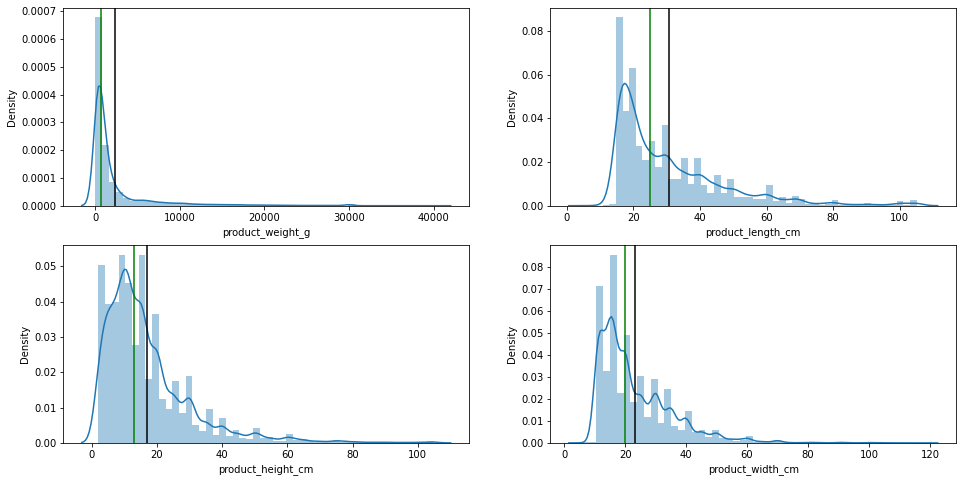

In [36]:
# checking skewness of the data
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(products.product_weight_g)
plt.axvline(products.product_weight_g.mean(), color="black")
plt.axvline(products.product_weight_g.median(), color="green")

plt.subplot(2,2,2)
sns.distplot(products.product_length_cm)
plt.axvline(products.product_length_cm.mean(), color="black")
plt.axvline(products.product_length_cm.median(), color="green")

plt.subplot(2,2,3)
sns.distplot(products.product_height_cm)
plt.axvline(products.product_height_cm.mean(), color="black")
plt.axvline(products.product_height_cm.median(), color="green")

plt.subplot(2,2,4)
sns.distplot(products.product_width_cm)
plt.axvline(products.product_width_cm.mean(), color="black")
plt.axvline(products.product_width_cm.median(), color="green")

plt.show()

In [37]:
# imputing the null values with the median of the columns, since there is normal skewness
products.product_weight_g.fillna(products.product_weight_g.median(), inplace = True)
products.product_length_cm.fillna(products.product_length_cm.median(), inplace = True)
products.product_height_cm.fillna(products.product_height_cm.median(), inplace = True)
products.product_width_cm.fillna(products.product_width_cm.median(), inplace = True)

In [38]:
# checking null values once again
products.isna().sum().sort_values(ascending = False)

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

#### Now we will export the cleaned dataset to start our analysis on Tableau

In [39]:
# create a Pandas Excel writer using XlsxWriter as the engine
Market = pd.ExcelWriter("Retail_dataset_new.xlsx", engine = 'xlsxwriter')

In [40]:
orders.to_excel(Market, sheet_name = "order", index = False)
order_items.to_excel(Market, sheet_name = "order_items", index = False)
customers.to_excel(Market, sheet_name = "customers", index = False)
payments.to_excel(Market, sheet_name = "payments", index = False)
products.to_excel(Market, sheet_name = "products", index = False)

In [41]:
Market.save()
print("Files exported successfully.")

Files exported successfully.


In [42]:
# check if the export was successful
import os
os.getcwd()

'C:\\Users\\ASUS'

### Market Basket Analysis

Market basket analysis is a technique which helps us do cross-selling effectively by building strategies using the data of the purchases. This is because cross-selling can help increase profits by recommending groups of similar items to consumers. Using market basket analysis, we try to identify the strength of association between two products. Market basket analysis would help us identify combinations of products which are bought frequently.

Here we will perform market basket analysis based on <mark>product_category_name </mark>

Data Preparation
We will use the cleaned data set to prepare data for Market Basket analysis.

#### We will use this cleaned dataset to build necessary visualizations in Tableau

In [43]:
# reading order_items sheet
df1 = pd.read_excel("Retail_dataset_new.xlsx", sheet_name = "order_items")

In [44]:
df1.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [45]:
df1.shape

(112650, 6)

In [46]:
# reading products sheet
df2 = pd.read_excel("Retail_dataset_new.xlsx", sheet_name = "products")

In [47]:
df2.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,baby,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,housewares,625,20,17,13


In [48]:
df2.shape

(32951, 6)

In [49]:
# merging both the dataframes using the common column product_id
df = pd.merge(df1, df2, on = "product_id", how = "inner", indicator = True)

In [50]:
df.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,_merge
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650,28,9,14,both
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650,28,9,14,both
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650,28,9,14,both
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650,28,9,14,both
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650,28,9,14,both


In [51]:
df.shape

(112650, 12)

For our analysis we need only order_id and product_category_name

In [52]:
# filtering the dataframe to two columns
df = df[["order_id", "product_category_name"]]
df.head()

,order_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,toys
1,130898c0987d1801452a8ed92a670612,toys
2,532ed5e14e24ae1f0d735b91524b98b9,toys
3,6f8c31653edb8c83e1a739408b5ff750,toys
4,7d19f4ef4d04461989632411b7e588b9,toys


In [53]:
# checking the shape again
df.shape

(112650, 2)

In [54]:
# create a Pandas Excel writer using XlsxWriter as the engine
Market_Basket = pd.ExcelWriter("Market_Basket_Analysis.xlsx", engine = 'xlsxwriter')

In [55]:
df.to_excel(Market_Basket, sheet_name = 'order_prod', index = False)

In [56]:
Market_Basket.save()
print("Files exported successfully.")

Files exported successfully.


In [57]:
# check if the export was successful
import os
os.getcwd()

'C:\\Users\\ASUS'

Next, we will use this data file to perform Market Basket analysis and check the product category association in Tableau.

<h3> OBJECTIVES TO BE ACHIEVED IN TABLEAU </h3>
<ol>
<li>The top 20 ordered products by quantity are identified and visualised correctly.</li>
<li>The percentage running totals by revenue and number of orders are depicted correctly for each product.</li>
<li>The product categories which are ordered more than 5 times are identified.</li>
<li>Combinations of product categories which are frequently ordered together are identified and visualised appropriately</li>
<ol>